In [2]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.plot import *
from sgpi.util import get_dataset
from sgpi.mnist import *
import itertools

import pysgpp as sg
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

In [55]:
def hat(x):
    return max(1- abs(x), 0)

def linear_1(x, level, index):
    return hat((2**level)*x-index)

def linear_mod_1(x, level, index):
    if level == 1 and index == 1:
        return 1
    if level > 1:
        if index == 1:
            if 0 <= x <= 2**(1-level):
                return 2-2**level*x
            else:
                return 0
        if index == 2**level - 1:
            if 1-2**(1-level) <= x <= 1:
                return 2**level*x - index + 1
            else:
                return 0
    return hat(2**level*x-i)

def linear_d(x, level, index, mod=False):
    eval = 1.0
    for k,(l, i) in enumerate(zip(level, index)):
        if mod:
            eval = eval * linear_mod_1(x[k], l, i)
        else:
            eval = eval * linear_1(x[k], l, i)
    return eval

def i_for_l(level):
    return [i for i in range(0, 2**level) if i % 2 == 1]

In [56]:
x = [1, 0.5]
np.max(0, 0)

0

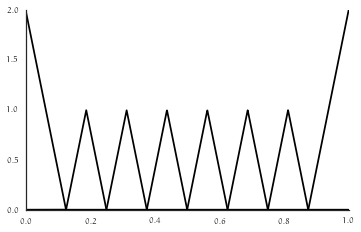

In [61]:
x = np.linspace(0, 1, num=2000)
level = 4
indices = i_for_l(level)
ys = []
for i in indices:
    ys.append([linear_mod_1(xi, level, i) for xi in x]) 
fig, ax = plt.subplots()
for y in ys:
    ax.plot(x,y, c='black')
sns.despine(fig)

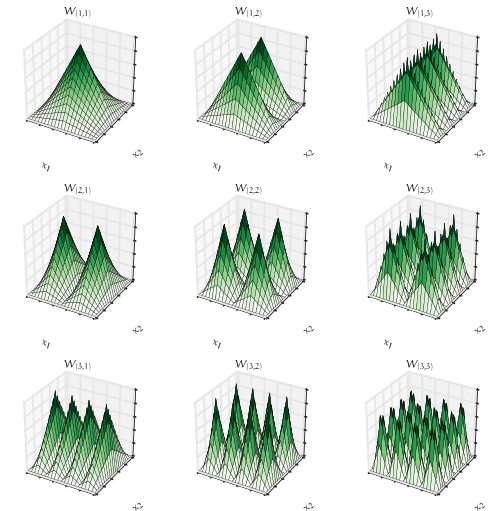

In [59]:
size = figsize(1.0)
fig = plt.figure(figsize=(size[0]*1.5, size[0]*2))
max_level = 3
for l1, l2 in itertools.product(range(max_level), range(max_level)):
    l1 = l1 + 1
    l2 = l2 + 1
    nth_plot = (l1-1)*max_level + l2
    ax = fig.add_subplot(max_level, max_level, nth_plot, projection='3d')
    level = [l1,l2]
    [i1s, i2s] = [i_for_l(l) for l in level]
    num = 200
    x1 = np.linspace(0, 1, num=num)
    [xx,yy] = np.meshgrid(x1, x1)
    ys = [] # List of all evaluations of basis functions.
    # The following code is a really ugly hack.
    # Matplotlib cannot handle multiple surface plots.
    # The following code only works, because the basis functions have disjoint support.
    for i1 in i1s:
        index = [0] * 2
        index[0] = i1
        for i2 in i2s:
            index[1] = i2
            y = np.array([linear_d([y,x], level, index, mod=False) for x in x1 for y in x1])
            ys.append(y)
    y = [0] * len(ys[0])
    for i in range(len(ys[0])):
        cur_max = 0
        for l in ys:
            cur_max = max(cur_max, l[i]) # l[i] can only be > 0 for one basis function!
        y[i] = cur_max
    y = np.array(y).reshape(num,num)
    ax.plot_surface(xx, yy, y, cmap='Greens', shade=False)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', labelleft='off')
    ax.tick_params(axis='z', which='both', bottom='off', top='off', labelleft='off')
    #ax.set_zlabel(r"Values of basis function")
    #ax.view_init(elev=45, azim=45)
    title = r"$W_{(" + str(l1) + "," + str(l2) + r")}$"
    ax.set_title(title, loc='center')
    ax.set(adjustable='box-forced', aspect='equal')
fig.subplots_adjust(hspace=-0.4)

In [695]:
figsize()

[5.7874021032240215, 3.5768112063550732]